In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [12]:
data = pd.read_csv('NSE-TATAGLOBAL.csv')

In [13]:
data.head()

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
0,2018-09-28,234.05,235.95,230.20,233.50,233.75,3069914,7162.35
1,2018-09-27,234.55,236.80,231.10,233.80,233.25,5082859,11859.95
2,2018-09-26,240.00,240.00,232.50,235.00,234.25,2240909,5248.60
3,2018-09-25,233.30,236.75,232.00,236.25,236.10,2349368,5503.90
4,2018-09-24,233.55,239.20,230.75,234.00,233.30,3423509,7999.55


In [14]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2035 entries, 0 to 2034
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Date                  2035 non-null   object 
 1   Open                  2035 non-null   float64
 2   High                  2035 non-null   float64
 3   Low                   2035 non-null   float64
 4   Last                  2035 non-null   float64
 5   Close                 2035 non-null   float64
 6   Total Trade Quantity  2035 non-null   int64  
 7   Turnover (Lacs)       2035 non-null   float64
dtypes: float64(6), int64(1), object(1)
memory usage: 127.3+ KB


In [15]:
data.isnull().sum()

Date                    0
Open                    0
High                    0
Low                     0
Last                    0
Close                   0
Total Trade Quantity    0
Turnover (Lacs)         0
dtype: int64

In [16]:
data.sort_values(by=['Date'], inplace=True, ascending= True)
data.Date.head()

2034    2010-07-21
2033    2010-07-22
2032    2010-07-23
2031    2010-07-26
2030    2010-07-27
Name: Date, dtype: object

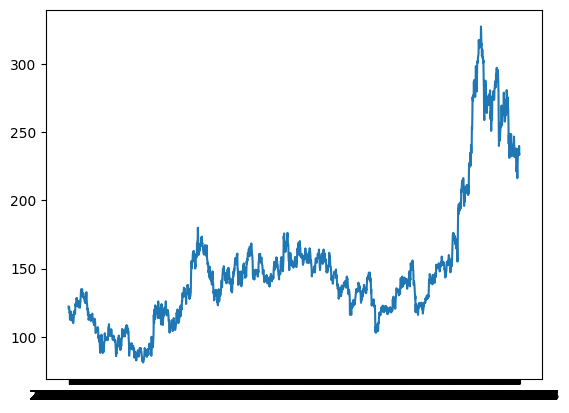

In [17]:
newdate = data['Date']
newdate
newopen = data['Open']
newdate
plt.plot(newdate,newopen)

In [19]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range = (0,1))

close_price = data['Close']

close_price = np.array(close_price).reshape(-1,1)
transformed_closed_value = scaler.fit_transform(close_price)

df = transformed_closed_value

df.shape

(2035, 1)

In [21]:
training_data_length = int(0.7*len(df))
testing_data_length = int(len(df) - training_data_length) 

In [22]:
training_data = df[:training_data_length]
testing_data = df[testing_data_length:]


In [23]:
print(f'size of training data is {len(training_data)} and testing data is {len(testing_data)}')
1221+814

size of training data os 1424 and testing data is 1424


2035

In [24]:
def create_dataset(dataset, n_dataset_length):
    X = []
    Y = []
    for i in range(len(dataset) - n_dataset_length - 1):
        X.append(dataset[i:i + n_dataset_length, 0])
        Y.append(dataset[i + n_dataset_length, 0])
    return np.array(X), np.array(Y)

In [25]:
n_dataset_length = 50

X_training , Y_training = create_dataset(training_data, n_dataset_length)
X_testing , Y_testing = create_dataset(testing_data, n_dataset_length)

In [26]:
print(X_training.shape), print(X_testing.shape), print(Y_training.shape), print(Y_testing.shape)

(1373, 50)
(1373, 50)
(1373,)
(1373,)


(None, None, None, None)

In [27]:
X_training = X_training.reshape(X_training.shape[0], X_training.shape[1], 1)
X_testing = X_testing.reshape(X_testing.shape[0], X_testing.shape[1], 1)

In [28]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

mdl = Sequential()

# Optionally, the first layer can receive an `input_shape` argument
mdl.add(LSTM(50, return_sequences=True, input_shape=(50, 1))) 

#inner layer
mdl.add(LSTM(50, return_sequences=True))
mdl.add(LSTM(50))

#output layer
mdl.add(Dense(1))

mdl.compile(loss='mean_squared_error', optimizer='adam')

In [29]:
mdl.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 50, 50)            10400     
                                                                 
 lstm_1 (LSTM)               (None, 50, 50)            20200     
                                                                 
 lstm_2 (LSTM)               (None, 50)                20200     
                                                                 
 dense (Dense)               (None, 1)                 51        
                                                                 
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


In [30]:
model = mdl.fit(X_training, Y_training, validation_data=(X_testing, Y_testing), epochs=100, batch_size=64, verbose=1);
%store model

Epoch 1/100
22/22 [==============================] - 9s 137ms/step - loss: 0.0101 - val_loss: 0.0107
Epoch 2/100
22/22 [==============================] - 2s 88ms/step - loss: 0.0017 - val_loss: 0.0022
Epoch 3/100
22/22 [==============================] - 2s 97ms/step - loss: 8.9873e-04 - val_loss: 0.0016
Epoch 4/100
22/22 [==============================] - 2s 89ms/step - loss: 8.3090e-04 - val_loss: 0.0017
Epoch 5/100
22/22 [==============================] - 2s 93ms/step - loss: 8.0546e-04 - val_loss: 0.0017
Epoch 6/100
22/22 [==============================] - 2s 90ms/step - loss: 7.5709e-04 - val_loss: 0.0014
Epoch 7/100
22/22 [==============================] - 2s 91ms/step - loss: 7.5900e-04 - val_loss: 0.0014
Epoch 8/100
22/22 [==============================] - 2s 92ms/step - loss: 7.8779e-04 - val_loss: 0.0024
Epoch 9/100
22/22 [==============================] - 4s 188ms/step - loss: 7.0892e-04 - val_loss: 0.0022
Epoch 10/100
22/22 [==============================] - 4s 199ms/step - 

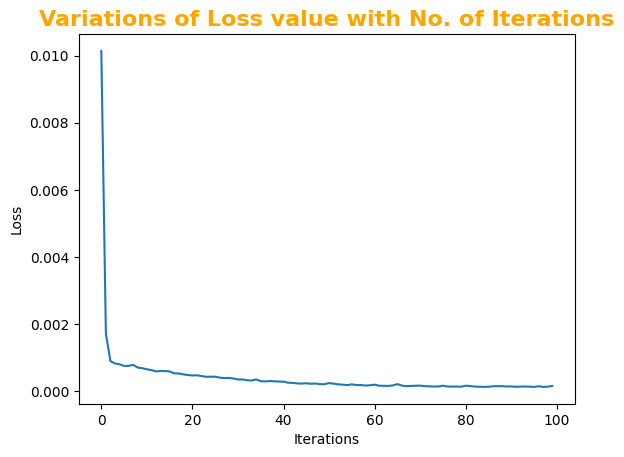

In [31]:
loss = mdl.history.history['loss']
plt.plot(loss)
plt.xlabel("Iterations")
plt.ylabel("Loss")
plt.title("Variations of Loss value with No. of Iterations", color="orange", fontsize=16, fontweight="bold");

In [32]:
train_preds = scaler.inverse_transform(mdl.predict(X_training))

test_preds = scaler.inverse_transform(mdl.predict(X_testing))

43/43 [==============================] - 1s 14ms/step


In [33]:
train_preds.shape

(1373, 1)

Text(0, 0.5, 'Closing Price')

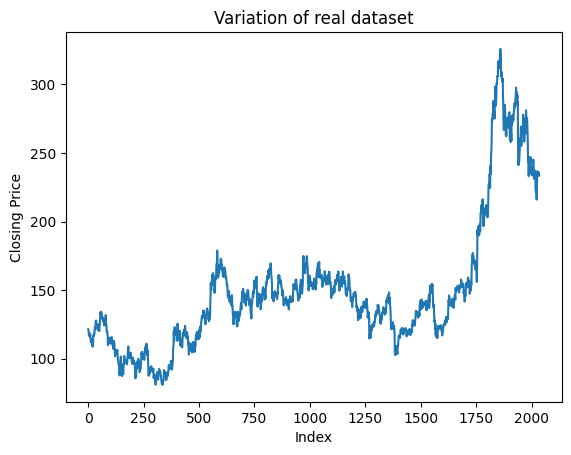

In [34]:
plt.plot(scaler.inverse_transform(df))
plt.title("Variation of real dataset")
plt.xlabel("Index")
plt.ylabel("Closing Price")

In [36]:
# Assuming 'train_preds' and 'test_preds' are the arrays containing predicted values for training and testing data, respectively.

look_back = 50

trainPredictPlot = np.empty_like(df)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_preds) + look_back, :] = train_preds

testPredictPlot = np.empty_like(df)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(df) - len(test_preds):, :] = test_preds


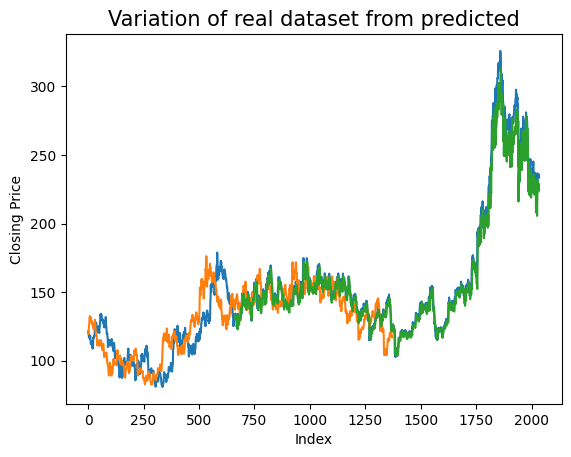

In [37]:
plt.plot(scaler.inverse_transform(df))
plt.plot(train_preds)
plt.title("Variation of real dataset from predicted",fontsize = "15")
plt.xlabel("Index")
plt.ylabel("Closing Price")
plt.plot(testPredictPlot)
plt.show()

In [38]:
len(X_training) , len(X_testing)

(1373, 1373)

In [39]:
preds_input = testing_data[1374:]
preds_input.shape

(50, 1)

In [40]:
preds_input = preds_input.reshape(1, -1)

In [41]:
temp_input = list(preds_input)
len(temp_input)

1

In [42]:
temp_input = temp_input[0].tolist()

In [43]:
len(temp_input)

50

In [44]:
Thirty_days_output=[]
i=0

while(i<30):
    if(len(temp_input)>50):
        temp_input = temp_input[1:]
        preds_input=np.array(temp_input)
        preds_input=preds_input.reshape(1,-1)
    


    preds_input = preds_input.reshape(1, n_dataset_length,1)
    day_output = mdl.predict(preds_input, verbose=0)
    temp_input.extend(day_output[0].tolist()) # Put in inpu i,e original
    Thirty_days_output.extend(day_output.tolist()) #Put in 30 days array

    #print(f"Day-{i+1} input:\n\n{preds_input}\n\n")
    #print(f"Day-{i+1} output:\n\n{day_output}\n\n")
    i=i+1

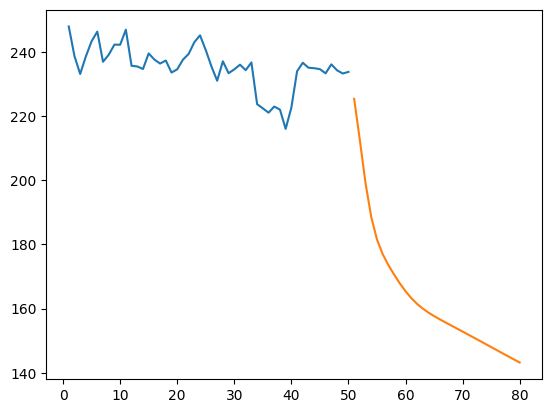

In [45]:
new_50_days = np.arange(1,51)
predicted_30_days = np.arange(51,81)

new_50_days_output = df[1985:]
plt.plot(new_50_days, scaler.inverse_transform(new_50_days_output))
plt.plot(predicted_30_days, scaler.inverse_transform(Thirty_days_output));

In [46]:
new_50_days_output_list = new_50_days_output.tolist()
new_50_days_output_list.extend(Thirty_days_output)